## TASK -3

In [0]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D ,Conv2DTranspose,Reshape,Lambda
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from keras import metrics
from keras.regularizers import l2



In [0]:

import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

**DOWNLOADNG AND EXTRACTING DATA**

In [88]:
!curl --header "Host: doc-0k-b0-docs.googleusercontent.com" --header "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.97 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header "Accept-Language: en-IN,en-GB;q=0.9,en-US;q=0.8,en;q=0.7,mr;q=0.6,hi;q=0.5,pa;q=0.4" --header "Referer: https://drive.google.com/uc?id=12OYCKGQp1VybvLM157ioLU4Bjt7PWpt-&export=download" --header "Cookie: AUTH_4qfsdd7r858ce8d41dqkeaav50vc409p_nonce=es8n1dt9ecf8u" --header "Connection: keep-alive" "https://doc-0k-b0-docs.googleusercontent.com/docs/securesc/ff3tlp0ehp27q9n806jaka3jt4nqgvkm/k5q3ve6qur8re8901g117q0a9l8b3b9d/1573977600000/00086191617149100952/01395220341708371990/12OYCKGQp1VybvLM157ioLU4Bjt7PWpt-?e=download&authuser=0&nonce=es8n1dt9ecf8u&user=01395220341708371990&hash=aj33aipuma9ntsd6pc0fufu4da8nfvm5" -o "Character + Digits data.zip" -L

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 41.2M    0 41.2M    0     0  56.8M      0 --:--:-- --:--:-- --:--:-- 56.7M


In [0]:
import shutil

In [0]:
shutil.unpack_archive('/content/Character + Digits data.zip')

In [0]:
shutil.unpack_archive('/content/Character + Digits data/characters-digits-train.zip')

In [0]:
shutil.unpack_archive('/content/Character + Digits data/characters-digits-test.zip')

In [0]:
df_main=pd.read_csv('/content/characters-digits-train.csv')
df_test=pd.read_csv('/content/characters-digits-test.csv')

In [94]:
df_main

,45,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.494,0.495,0.496,0.497,0.498,0.499,0.500,0.501,0.502,0.503,0.504,0.505,0.506,0.507,0.508,0.509,0.510,0.511,0.512,0.513,0.514,0.515,0.516,0.517,0.518,0.519,0.520,0.521,0.522,0.523,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533
0,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112794,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,0,0,0,...,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112795,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112796,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112797,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [95]:
df_test

,41,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.493,0.494,0.495,0.496,0.497,0.498,0.499,0.500,0.501,0.502,0.503,0.504,0.505,0.506,0.507,0.508,0.509,0.510,0.511,0.512,0.513,0.514,0.515,0.516,0.517,0.518,0.519,0.520,0.521,0.522,0.523,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532
0,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18794,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18795,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18796,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18797,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df_prime=df_main.copy()
df_prime_test=df_test.copy()

In [0]:
df_prime=df_prime.drop(['45'],axis=1)
df_prime_test=df_prime_test.drop(['41'],axis=1)

In [0]:
target_values=df_main['45']
target_values_test=df_test['41']

**CLASS DISTRIBUTION**

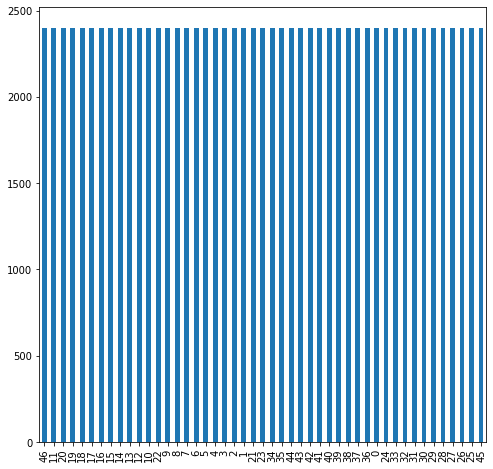

In [99]:
target_values.value_counts().plot(kind='bar',figsize=(8,8))

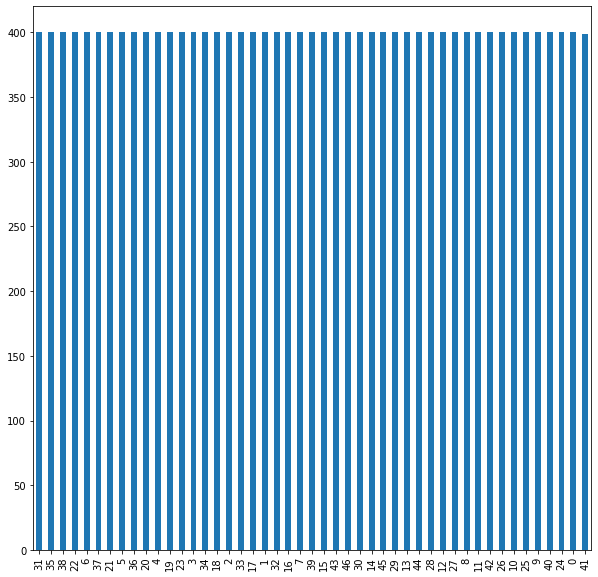

In [100]:
target_values_test.value_counts().plot(kind='bar',figsize=(10,10))

**THE DATASET IS COMPLETELY BALANCED**

**EXTRACTING PROPER LABEL VECTORS**

In [0]:
mapping={}
with open('/content/Character + Digits data/characters-digits-mapping.txt') as file:
    splitted_part=file.read().split("\n")
    try:
        for items in splitted_part:
              item_split=items.split(" ")
              mapping[int(item_split[0])]=int(item_split[1])
    except:
          pass



In [48]:

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y= np_utils.to_categorical(target_values,47)
Y_test= np_utils.to_categorical(target_values_test,47)


print("After converting the output into a vector : ",Y[0])

After converting the output into a vector :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
df_main['45']=df_main['45'].map(mapping)
df_test['41']=df_test['41'].map(mapping)

In [50]:
df_main['45']

0          97
1         110
2          70
3          52
4         104
         ... 
112794     77
112795     72
112796     78
112797     86
112798     56
Name: 45, Length: 112799, dtype: int64

# **VISUALIZING DATA**

In [51]:
max(df_test['41'].values)

116

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


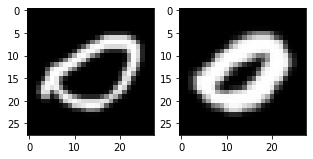

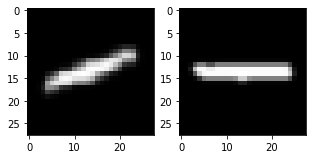

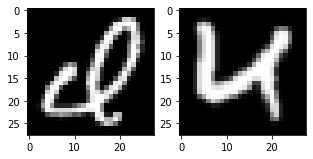

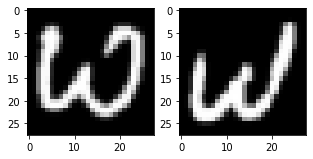

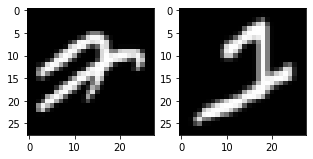

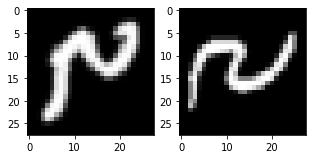

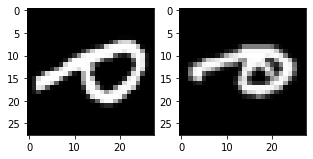

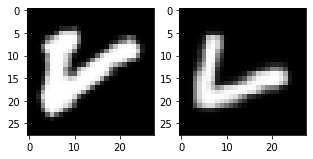

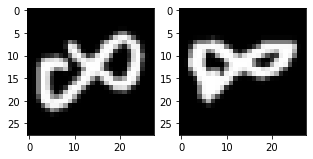

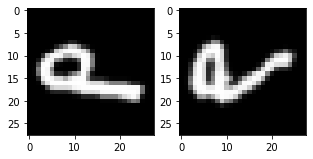

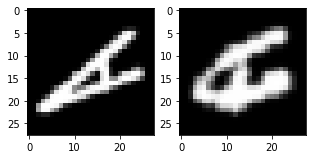

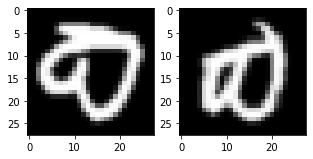

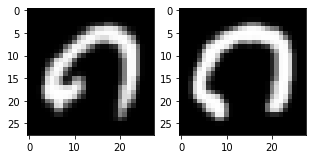

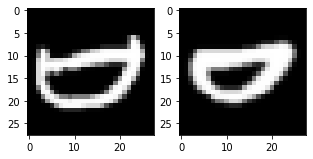

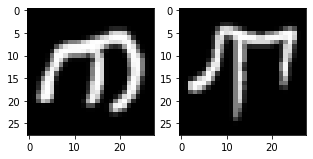

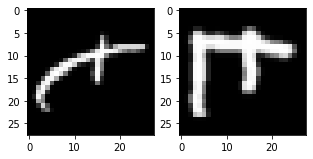

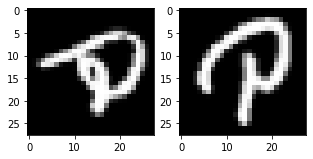

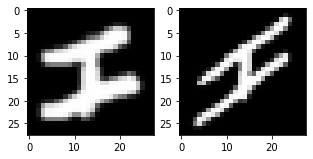

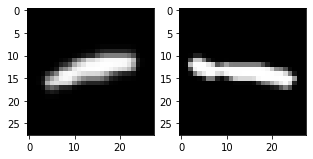

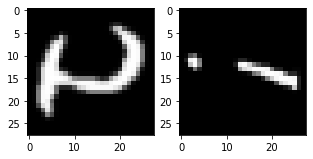

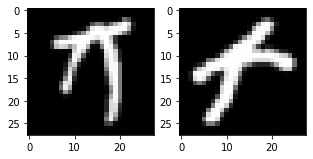

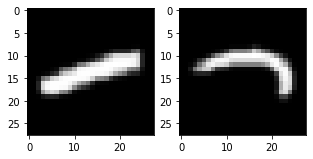

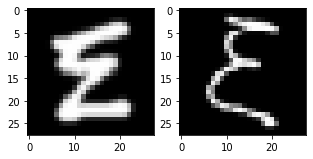

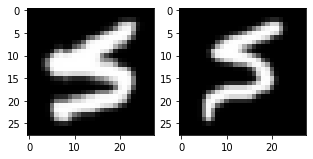

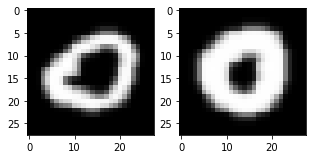

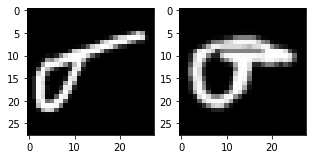

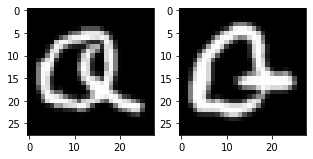

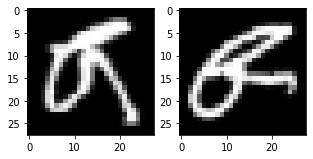

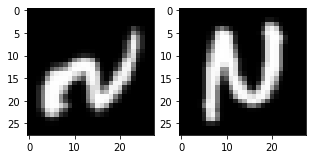

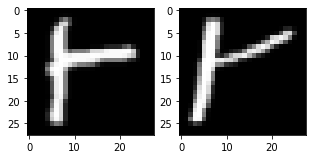

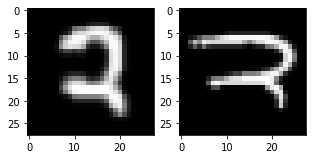

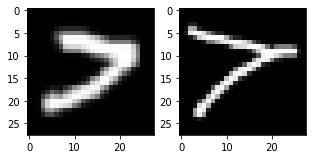

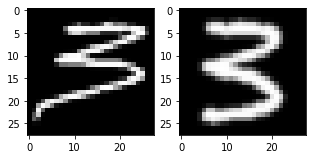

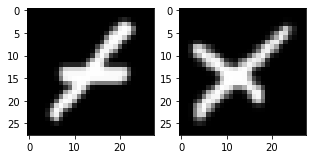

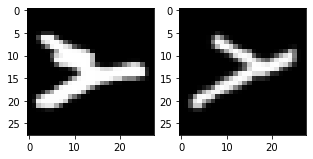

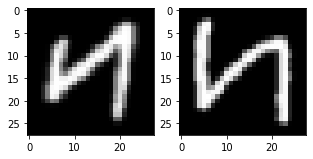

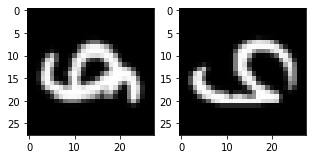

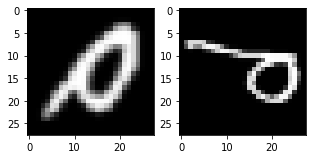

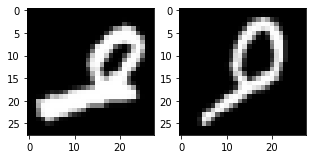

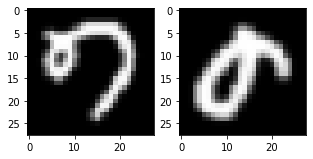

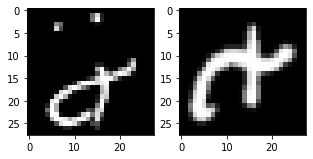

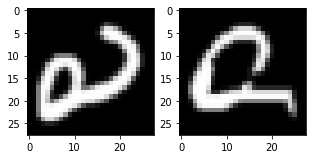

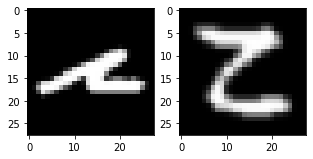

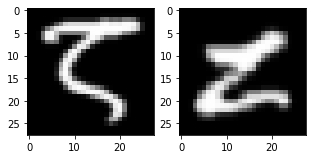

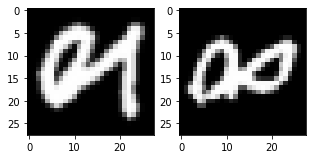

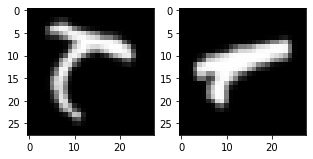

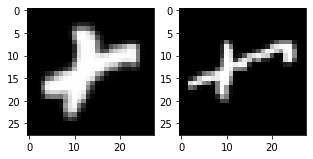

In [53]:
for i in range(47):
    index=np.where(df_main['45'].values.ravel()==mapping[i])
    images=df_prime.iloc[index].values[:2]
    fig,axes = plt.subplots(1, 2,figsize=(5,5))
    for j in range(2):
      axes[j].imshow(images[j].reshape(28,28), cmap='gray')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


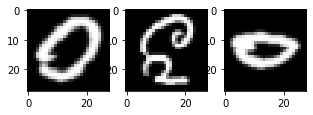

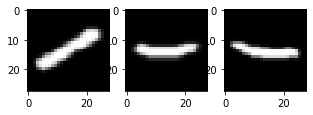

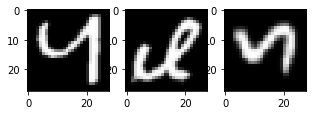

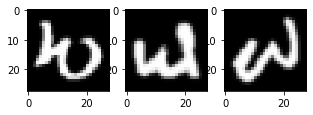

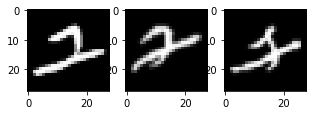

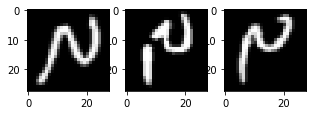

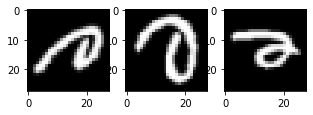

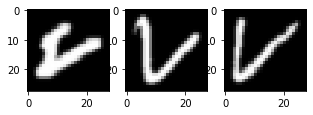

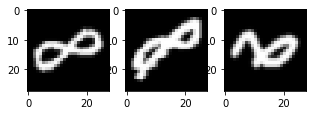

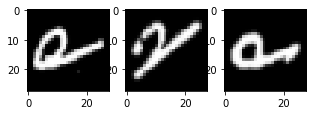

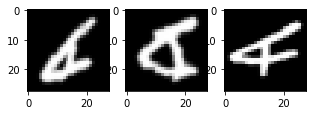

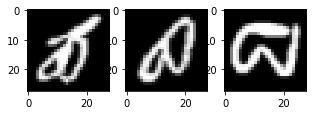

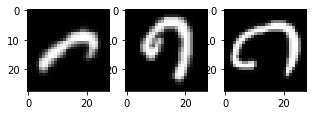

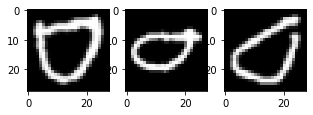

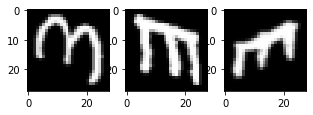

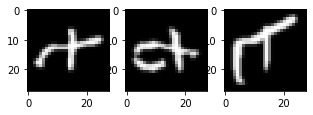

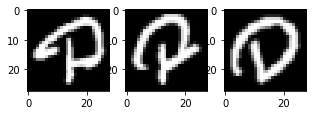

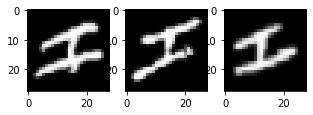

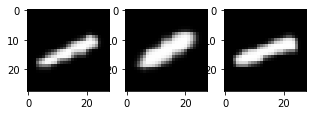

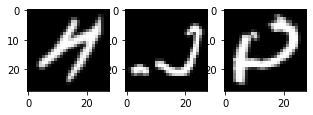

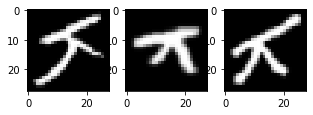

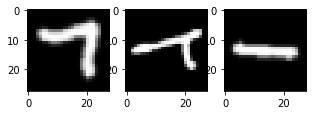

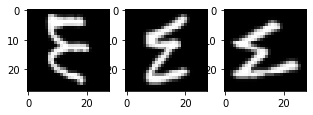

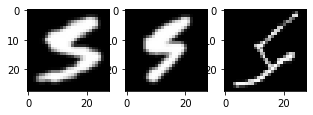

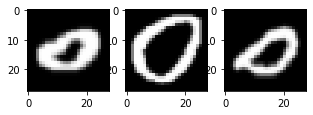

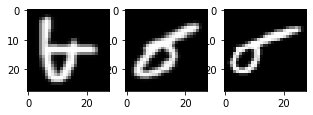

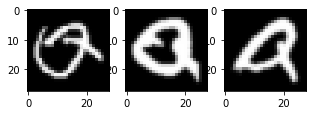

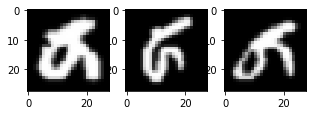

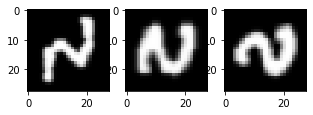

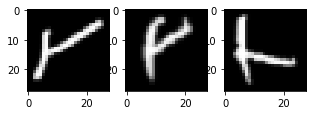

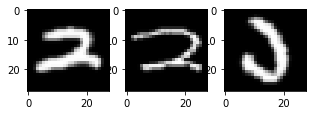

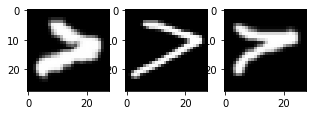

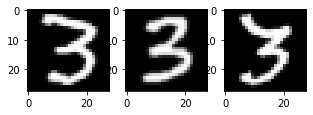

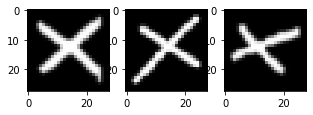

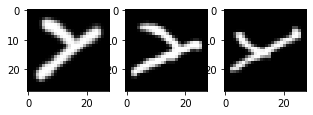

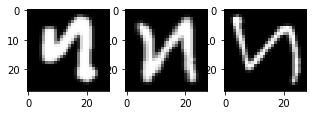

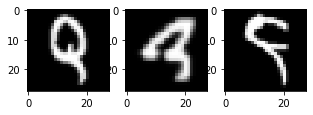

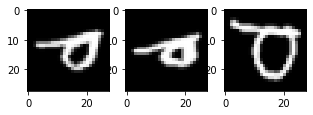

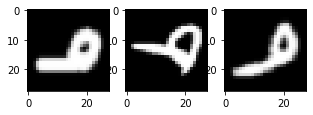

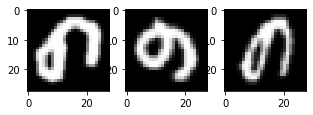

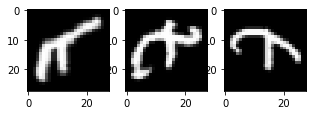

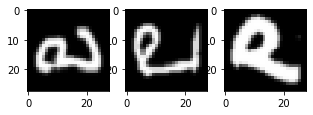

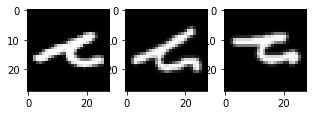

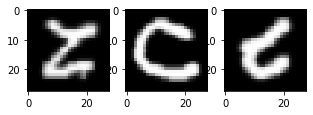

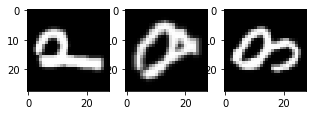

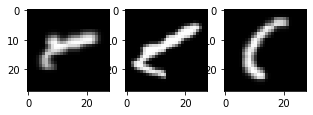

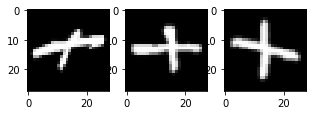

In [54]:
for i in range(47):
    index=np.where(df_test['41'].values.ravel()==mapping[i])
    images=df_prime_test.iloc[index].values[:3]
    fig,axes = plt.subplots(1, 3,figsize=(5,5))
    for j in range(3):
      axes[j].imshow(images[j].reshape(28,28), cmap='gray')

**TRAIN TEST SPLIT**

In [57]:


# input image dimensions
img_rows, img_cols = 28, 28

x_train, x_cv, y_train, y_cv= train_test_split(df_prime.values,Y,test_size=0.33,random_state=42)
x_test=df_prime_test.values


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_cv = x_cv.reshape(x_cv.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_cv = x_cv.reshape(x_cv.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_cv = x_cv.astype('float32')
x_test=x_test.astype('float32')
x_cv /= 255
x_train /= 255
x_test/=255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_cv.shape[0], 'cross-validation samples')
print(x_test.shape[0],'Test samples')

x_train shape: (75575, 28, 28, 1)
75575 train samples
37224 cross-validation samples
18799 Test samples


**TRAINING THE MODEL**

In [0]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint

reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.9,
                              patience=2, min_lr=0.000001)
mcp_save = ModelCheckpoint('model.hdf5', save_best_only=True, monitor='val_acc', mode='max')

In [0]:
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Conv2D(128, kernel_size=(3,3),
                 activation='relu',
                 input_shape=input_shape,padding='SAME'))
model.add(Conv2D(64, (3,3), activation='relu',padding='SAME'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=1))
model.add(Conv2D(32, (5,5), activation='relu',padding='SAME'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3,3), activation='relu',padding='SAME'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu',padding='SAME'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu',padding='SAME'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=1))
model.add(Conv2D(64, (5, 5), activation='relu',padding='SAME'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(47, activation='softmax'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train,y_train,
                  batch_size=32,
                epochs=5,
                verbose=1,
                validation_data=(x_cv, y_cv),callbacks=[mcp_save,reduce_lr])

Train on 75575 samples, validate on 37224 samples
Epoch 1/5
75575/75575 [==============================] - 122s 2ms/step - loss: 0.0305 - acc: 0.9898 - val_loss: 0.0160 - val_acc: 0.9940
Epoch 2/5
75575/75575 [==============================] - 119s 2ms/step - loss: 0.0170 - acc: 0.9936 - val_loss: 0.0148 - val_acc: 0.9942
Epoch 3/5
75575/75575 [==============================] - 116s 2ms/step - loss: 0.0149 - acc: 0.9944 - val_loss: 0.0129 - val_acc: 0.9950
Epoch 4/5
75575/75575 [==============================] - 115s 2ms/step - loss: 0.0138 - acc: 0.9947 - val_loss: 0.0128 - val_acc: 0.9950
Epoch 5/5
75575/75575 [==============================] - 116s 2ms/step - loss: 0.0129 - acc: 0.9951 - val_loss: 0.0125 - val_acc: 0.9951


In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 128)       1280      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 28, 28, 64)        73792     
_________________________________________________________________
batch_normalization_22 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 27, 27, 32)        51232     
_________________________________________________________________
batch_normalization_23 (Batc (None, 27, 27, 32)        128       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 13, 13, 32)       

In [0]:
model.load_weights("model.hdf5")

**PLOTS AND RESULTS**

37224/37224 [==============================] - 10s 273us/step
Test loss: 0.012939076293873178
Test accuracy: 0.9950597385686981
Train loss: 0.010478593149658981
Train accuracy: 0.9958001604570761
CV loss: 0.01249637532158213
CV accuracy: 0.9951398506898304


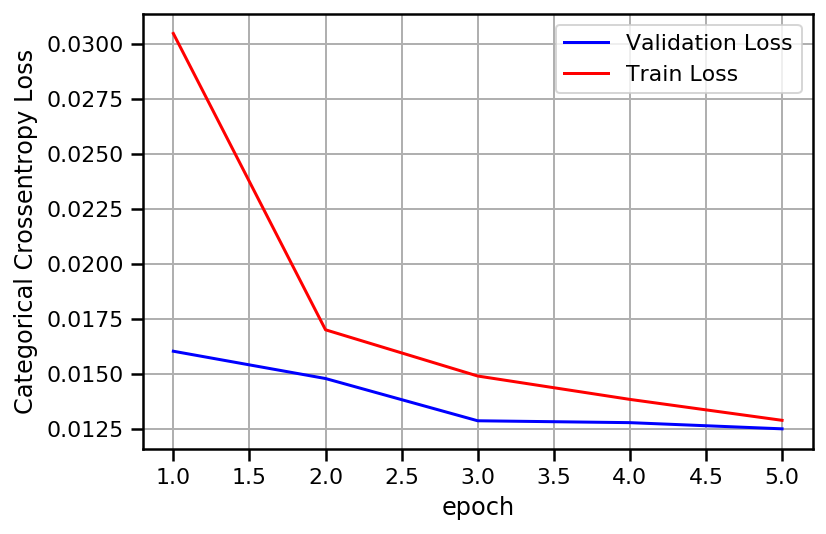

In [0]:

%matplotlib inline
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'


score = model.evaluate(x_test, Y_test) 
score_train=model.evaluate(x_train,y_train)
score_cv=model.evaluate(x_cv,y_cv)

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

print('Train loss:', score_train[0]) 
print('Train accuracy:', score_train[1])

print('CV loss:', score_cv[0]) 
print('CV accuracy:', score_cv[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,5+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
model.save("model_task_3")

# **COMPLETE PIPELINE**

In [0]:
from keras.models import load_model

In [0]:

#loading all the models
model_task_3=load_model("model_task_3")


In [0]:
def app(data):

      plt.imshow(data.reshape(28,28), cmap='gray')
      plt.axis('off')
      plt.show()

      data = data.reshape(1, 28, 28,1)
      
      prediction=np.argmax(model_task_3.predict(data))

      print("It is a",chr(mapping[prediction]))


      
      


      






      



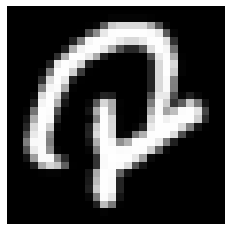

It is a G


In [197]:
app(df_prime_test.iloc[12,:].values)

**CONSFUSION MATRIX AND CLASS WISE ACCURACY**

In [0]:
def plot_confusion_matrix(cm, classes, cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
from keras.models import load_model

model=load_model("model_task_3")

In [0]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)  
    A =(((C.T)/(C.sum(axis=1))).T)
    class_labels=[]
    for i in range(47):
         class_labels.append(chr(mapping[i]))
    cmap=sns.light_palette("green")
    plt.figure(figsize=(22,22))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".1f", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()
    plt.savefig('class_wise_accuracy.png')

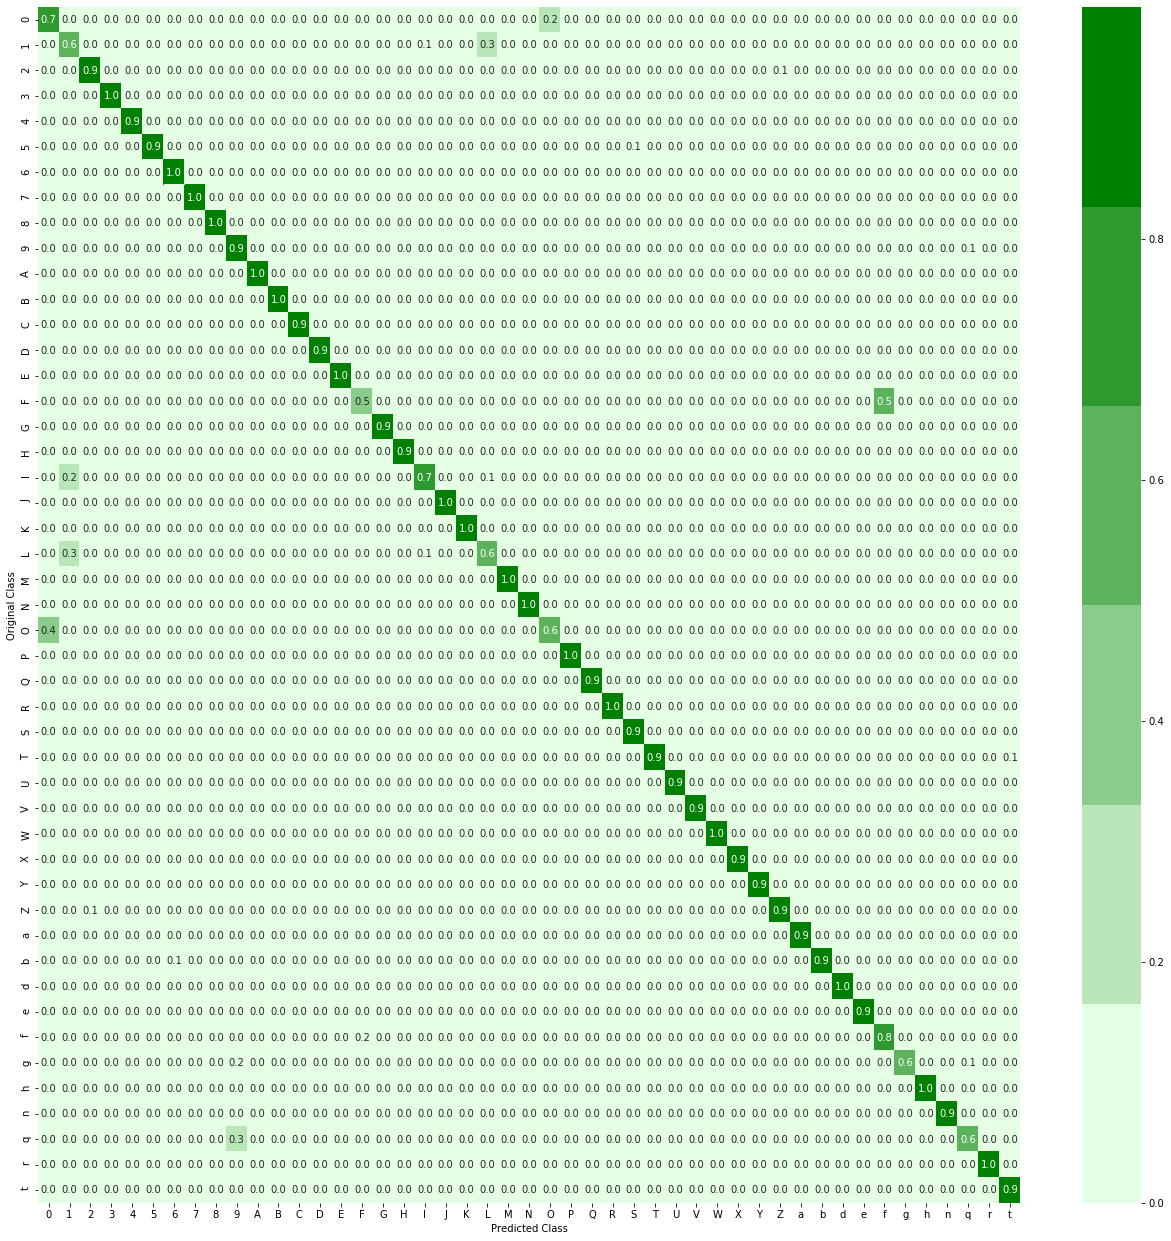

<Figure size 432x288 with 0 Axes>

In [192]:
preds=model.predict(x_test)
preds=np.argmax(preds,axis=1)
plot_confusion_matrix(target_values_test,preds)

**WE GET A CLASS WISE ACCURACY FOR EVERY CLASS USING A SIMPEL CONFUSION MATRIX**

# **CONCLUSIONS:**

1.Using a 7 layers CNN architecture we get very good results on our test data of over 99% accuracy.

2.To prevent overfitting we use dropout > 0.5.

3.We also penalize our learning rate by 90% when accuracy falls for more than 2 epochs

4.Experimented with various learning rate and Optimizers and got best results with Adadelta.

5.Use of bactch normalization for smooth training and better results.





In [0]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Data","Loss", "Accuracy In %"]

x.add_row(["Test",0.012939076293873178,0.9950597385686981])

x.add_row(["Train",0.010478593149658981,0.9958001604570761])


x.add_row(["CV",0.01249637532158213,0.99513985068983041])

print(x)

+-------+----------------------+--------------------+
|  Data |         Loss         |   Accuracy In %    |
+-------+----------------------+--------------------+
|  Test | 0.012939076293873178 | 0.9950597385686981 |
| Train | 0.010478593149658981 | 0.9958001604570761 |
|   CV  | 0.01249637532158213  | 0.9951398506898305 |
+-------+----------------------+--------------------+
